# Name : Varigonda Sai Nirmal Vignu

# Assignment 1 : Exploratory Data Analysis 

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
df=pd.read_csv("sales_full_data.csv")

In [162]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [163]:
  df.shape

(186850, 6)

In [164]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [165]:
df.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              18
Order Date          142396
Purchase Address    140788
dtype: int64

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [167]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

 **it shows us every column in our data set has 545 null values**

**as every column has same no of null values and we have total 186850 rows i can simply ignore the null values by dropping them**

In [168]:
df1=df.dropna()

In [169]:
df1.duplicated().sum()

618

**It shows total 618 duplicate records are there so we can remove them**

In [170]:
df1=df1.drop_duplicates()

In [171]:
df1.duplicated().sum()

0

In [172]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [173]:
df1.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# Question 1

**Which month had the highest and lowest sales ?**

In [174]:
df1.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [175]:
new = df1["Order Date"].str.split(" ", n = 1, expand = True)
df1["Date"]= new[0]
df1["Time"]= new[1]

In [177]:
new1 = df1["Time"].str.split(":", n = 1, expand = True)
df1["Hour"]= new1[0]
df1["Min"]= new1[1]

In [178]:

df1['Order Date']= pd.to_datetime(df1['Order Date'], dayfirst=True, errors='coerce')

In [179]:
df1['Order Date']

0        2019-04-19 08:46:00
2        2019-07-04 22:30:00
3        2019-12-04 14:38:00
4        2019-12-04 14:38:00
5        2019-04-30 09:27:00
                 ...        
186845   2019-09-17 20:56:00
186846   2019-01-09 16:00:00
186847   2019-09-23 07:39:00
186848   2019-09-19 17:30:00
186849   2019-09-30 00:18:00
Name: Order Date, Length: 185687, dtype: datetime64[ns]

In [180]:
df1['month'] = pd.DatetimeIndex(df1['Order Date']).month

In [181]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time,Hour,Min,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04/19/19,08:46,08,46,4.0
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",04-07-19,22:30,22,30,7.0
3,176560,Google Phone,1,600,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,14,38,12.0
4,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,14,38,12.0
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,09,27,4.0


In [182]:
df1['month'].isnull().sum()

1

In [183]:
df1['month'].fillna(method='bfill',inplace=True)

In [184]:
df1['month'].isnull().sum()

0

In [185]:
df1['month']=df1['month'].astype('int32')

In [186]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time,Hour,Min,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04/19/19,08:46,08,46,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",04-07-19,22:30,22,30,7
3,176560,Google Phone,1,600,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,14,38,12
4,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,14,38,12
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,09,27,4


In [187]:
max(df1['month'])

12

In [188]:
min(df1['month'])

1

In [189]:
k=df1['month'].value_counts()[:len(df1["month"])].sort_values(ascending=False)

In [190]:
k

12    21540
10    18728
4     16998
11    16618
5     16186
3     15044
7     14768
6     14224
8     13428
9     13071
2     13064
1     12018
Name: month, dtype: int64

In [191]:
kd=pd.DataFrame(k,columns=['month'])
kd['months'] = list(k.index)



kd.rename(columns = {'month': 'no of orders'}, inplace = True)

kd=kd.reset_index()

kd1=kd[['months','no of orders']]
kd1

,months,no of orders
0,12,21540
1,10,18728
2,4,16998
3,11,16618
4,5,16186
5,3,15044
6,7,14768
7,6,14224
8,8,13428
9,9,13071


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


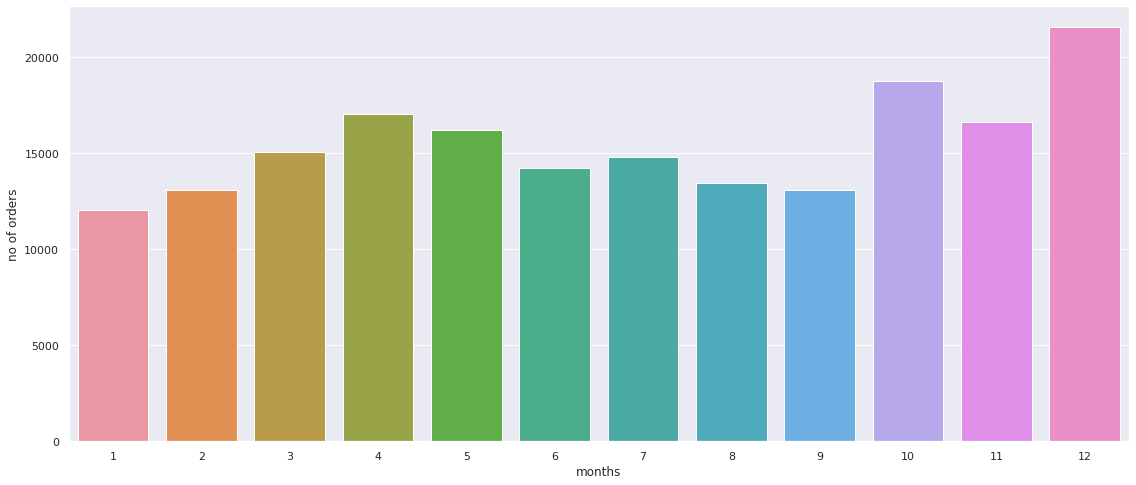

In [192]:
sns.barplot(kd1['months'],kd1['no of orders'])

# **From above observation 12 i.e in December month we can see highest sales and in 1 i.e January month we can see lowest sales**

# Reason-
*   December month is last month of the year and we can see everyone maximum usage of product i upto one year only so they can bought the products at the end of the year i.e December and due to christmas and new year eve more people bought gifts for there loved ones

*  As most of the people bought in December as next is new year and starting of the new month january i thin the sales was less

# Question 2

**At what time of the day would you put out advertisement so that sales increase?**

In [200]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time,Hour,Min,month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04/19/19,08:46,08,46,4
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",04-07-19,22:30,22,30,7
3,176560,Google Phone,1.0,600,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,14,38,12
4,176560,Wired Headphones,1.0,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,14,38,12
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,09,27,4


In [198]:
ll = df1['Hour'].value_counts()

In [199]:
ll

19      12886
12      12573
11      12392
18      12263
20      12218
13      12115
14      10965
10      10929
21      10905
17      10884
16      10359
15      10159
22       8808
23       6262
09       5283
08       3802
9        3457
8        2450
07       2410
00       2385
7        1592
06       1528
0        1517
01       1435
6         953
1         912
05        830
02        757
04        536
03        535
5         490
2         485
4         316
3         295
Date        1
Name: Hour, dtype: int64

In [201]:
ll_dict = ll.to_dict()

In [202]:
ll_dict

{'0': 1517,
 '00': 2385,
 '01': 1435,
 '02': 757,
 '03': 535,
 '04': 536,
 '05': 830,
 '06': 1528,
 '07': 2410,
 '08': 3802,
 '09': 5283,
 '1': 912,
 '10': 10929,
 '11': 12392,
 '12': 12573,
 '13': 12115,
 '14': 10965,
 '15': 10159,
 '16': 10359,
 '17': 10884,
 '18': 12263,
 '19': 12886,
 '2': 485,
 '20': 12218,
 '21': 10905,
 '22': 8808,
 '23': 6262,
 '3': 295,
 '4': 316,
 '5': 490,
 '6': 953,
 '7': 1592,
 '8': 2450,
 '9': 3457,
 'Date': 1}

<BarContainer object of 35 artists>

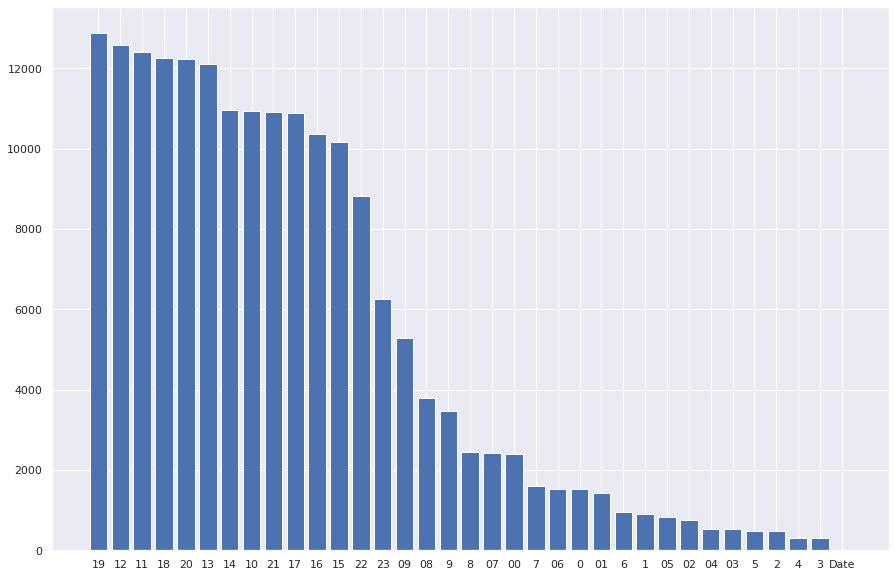

In [203]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
keys = ll_dict.keys()
values = ll_dict.values()

plt.bar(keys, values)

# **From above plot we can observe that most of the orders are happened at 7pm so to increase the sale i recommend to put out the sales advertisement by 7pm**

# Question 3

 **What products were sold the most ?**

In [193]:
l=df1['Product'].unique()
l

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
       'Product'], dtype=object)

In [194]:
l1=pd.DataFrame(l,columns=['Product'])
l1

,Product
0,USB-C Charging Cable
1,Bose SoundSport Headphones
2,Google Phone
3,Wired Headphones
4,Macbook Pro Laptop
5,Lightning Charging Cable
6,27in 4K Gaming Monitor
7,AA Batteries (4-pack)
8,Apple Airpods Headphones
9,AAA Batteries (4-pack)


In [195]:
df1['Quantity Ordered']=pd.to_numeric(df1['Quantity Ordered'], errors='coerce', downcast=None)
df1['Quantity Ordered'].dtypes

dtype('float64')

In [196]:
sum_o=[]
for i in l:

  sum_o.append(df1.loc[df1['Product'] == i, 'Quantity Ordered'].sum())
l1['total quantity ordered']=sum_o
l1.sort_values('total quantity ordered',ascending=False)

,Product,total quantity ordered
9,AAA Batteries (4-pack),30986.0
7,AA Batteries (4-pack),27615.0
0,USB-C Charging Cable,23931.0
5,Lightning Charging Cable,23169.0
3,Wired Headphones,20524.0
8,Apple Airpods Headphones,15637.0
1,Bose SoundSport Headphones,13430.0
12,27in FHD Monitor,7541.0
10,iPhone,6847.0
6,27in 4K Gaming Monitor,6239.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


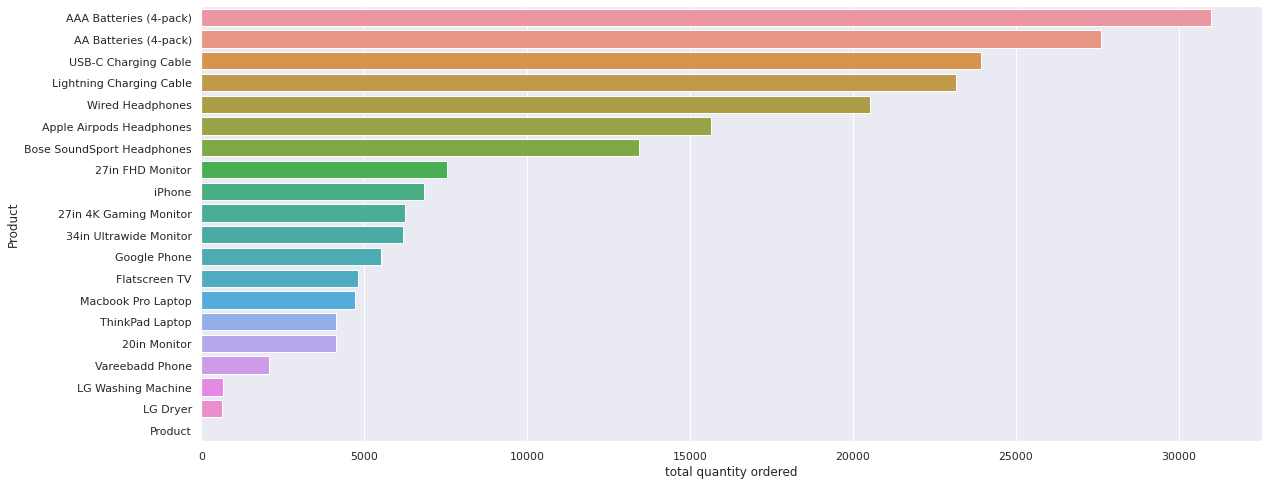

In [197]:
sns.set(rc = {'figure.figsize':(19,8)})
sns.barplot(l1['total quantity ordered'],l1['Product'],order=l1.sort_values('total quantity ordered',ascending = False).Product)

# From the above observations we can see that the products sold mostly are


*   AAA Batteries (4-pack) --->	30986.0
*   AA Batteries (4-pack)  --->	  27615.0
*   USB-C Charging Cable	---> 23931.0

**These are the top three products mostly sold**